In [1]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce MX250 (UUID: GPU-d582d5d1-d670-48ee-d4b9-532f6cffd4cc)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs, make_moons

In [2]:
#X,Y = make_blobs(n_samples= 500, centers= 2, n_features = 2, random_state= 10)
X,Y = make_moons(n_samples= 1000, shuffle=True, noise=0.2, random_state= 10)

X.shape, Y.shape

((1000, 2), (1000,))

In [3]:
X[:,0]
X[:,1]

array([-3.91737758e-02,  3.12825327e-01,  2.37721153e-01,  8.06940346e-01,
       -8.53096698e-01,  1.15831926e-01,  8.88606010e-01,  7.72089200e-01,
        5.65559543e-01,  7.76208728e-01, -3.39965938e-01,  3.64467421e-01,
        1.00362959e+00,  4.14545218e-02,  6.34608156e-01,  5.27151816e-01,
       -3.15154704e-01, -3.46523355e-01, -3.39683732e-01,  5.56114622e-01,
        3.31310972e-01,  1.09858497e+00,  8.49770540e-01,  6.63933401e-01,
        3.31141248e-01, -2.92015466e-02,  7.55674915e-01,  1.47026148e-01,
        7.21970206e-01,  7.84826273e-02,  6.46976156e-01,  6.71020972e-02,
        7.67715608e-01,  9.54847601e-02,  7.99111388e-01,  7.38472201e-01,
        1.01651269e+00,  2.19387410e-01,  7.51483230e-01,  1.30557634e-01,
        9.83185284e-01, -4.26842698e-01, -1.92997906e-02,  4.19724286e-01,
       -7.35042999e-02, -7.26132865e-02,  3.42641541e-01,  6.99528761e-03,
        6.99860989e-01,  4.26032307e-01,  3.54831934e-01,  5.89300295e-01,
        4.94555722e-01,  

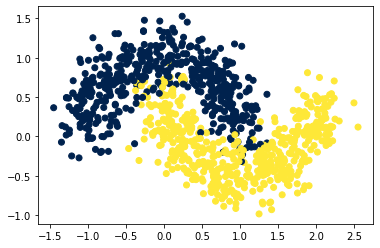

In [4]:
plt.scatter(x = X[:,0], y = X[:,1], c = Y, cmap= plt.cm.cividis)
plt.show()

# Model & Helper function

In [5]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [6]:
z = np.array([1, 2,3,4,5])
'''
Numpy Broadcasting
sigmoid(z) = np.array([sigmoid(1), sigmoid(2), sigmoid(3), sigmoid(4), sigmoid(5)])

'''
sigmoid(z)                    

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715])

In [7]:
def predict(X, weights):
    
    # x -> m X (n+1) matrix W -> n X 1 vector
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    return predictions

def loss(X,Y, weights):
    
    # Binary Cross Entropy / Log likelyhood
    Y_ = predict(X, weights)
    cost = np.mean((-Y * np.log(Y_)) - ((1-Y) * np.log(1-Y_)))
    return cost

def update(X,Y, weights, learning_rate):
    
    # Update rule for single epoch
    Y_ = predict(X, weights)
    dw = np.dot(X.T, Y_ -Y)
    
    m = X.shape[0]
    weights = weights - learning_rate * dw/(float(m))
    return weights

def train(X, Y, learning_rate, maxEpochs = 10000):
    Ones = np.ones((X.shape[0], 1))
    X = np.hstack((Ones, X))
    
    # Intialize the weights
    weights = np.zeros(X.shape[1])      ## n+1 entries
    
    # Iterate and use the update function
    for epoch in range(maxEpochs):
        weights = update(X,Y, weights, learning_rate)
        if epoch %1000 == 0:
            l = loss(X,Y, weights)
            print("Epoch Number %d Loss %.4f"%(epoch, l))
    return weights

In [8]:
weights = train(X, Y, learning_rate=0.01)

Epoch Number 0 Loss 0.6922
Epoch Number 1000 Loss 0.4040
Epoch Number 2000 Loss 0.3598
Epoch Number 3000 Loss 0.3412
Epoch Number 4000 Loss 0.3306
Epoch Number 5000 Loss 0.3237
Epoch Number 6000 Loss 0.3189
Epoch Number 7000 Loss 0.3155
Epoch Number 8000 Loss 0.3130
Epoch Number 9000 Loss 0.3112


## Visualization

In [9]:
def get_preds(X_test, weights, labels = True):
    if X_test.shape[1] != weights.shape[0]:
        ones = np.one(X_test.shape[0],1)
        X_test = np.hstack(ones, X_test)
        
    probs = predict(X_test, weights)
    
    if not labels :
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs >= 0.5] = 1
        return labels

In [10]:
weights

array([ 0.32241355,  1.19088279, -3.59299666])

In [11]:
x1 = np.linspace(-2, 5, 5)
x1
x2 = -(weights[0] + weights[1] * x1)/weights[2]
x2

array([-0.57315723,  0.00687249,  0.58690222,  1.16693195,  1.74696168])

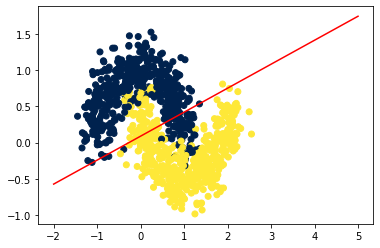

In [12]:
plt.scatter(x = X[:,0], y = X[:,1], c = Y, cmap= plt.cm.cividis)
plt.plot(x1, x2 , c= 'red')
plt.show()